# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.635946e+01     1.323707e+01
 * time: 0.0021409988403320312
     1     2.910150e+01     7.917795e+00
 * time: 0.008671045303344727
     2     2.455338e+01     4.501667e+00
 * time: 0.014215946197509766
     3     2.378985e+01     4.734802e+00
 * time: 0.01851201057434082
     4     2.248644e+01     5.162585e+00
 * time: 0.09099411964416504
     5     1.959943e+01     2.040755e+00
 * time: 0.09574699401855469
     6     1.873291e+01     2.143960e+00
 * time: 0.10101103782653809
     7     1.814152e+01     2.130397e+00
 * time: 0.10521817207336426
     8     1.776667e+01     1.292275e+00
 * time: 0.10933899879455566
     9     1.749443e+01     8.995123e-01
 * time: 0.11414313316345215
    10     1.738327e+01     1.373553e+00
 * time: 0.11794614791870117
    11     1.731317e+01     1.219924e+00
 * time: 0.12182307243347168
    12     1.720741e+01     1.018340e+00
 * time: 0.1265721321105957
    13     1.715002e+01     9.402903e-01
 * ti

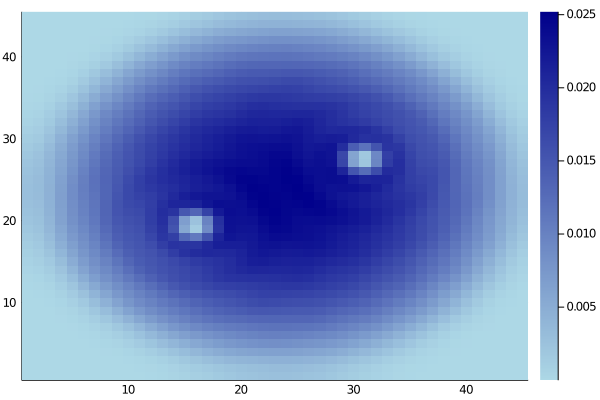

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)